In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc
from mpl_toolkits import mplot3d
# from mayavi import mlab

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

# dirc=sys.argv

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realtest/'
source_dir='/project2/tas1/pragallva/Spring_quarter/post_process_data/'
source = source_dir+'aqua_2m/'
            
make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/")
make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/")

fig_dest="/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/"

a=6371.0e3
R=a

In [2]:
# import plotly.plotly as ply
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# import numpy as np
# from skimage import measure

In [3]:
# import plotly
# plotly.tools.set_credentials_file(username='pragallva', api_key='SeoXyEAqz84T4oNyYCQm')

In [4]:
# import numpy as np
# from skimage import measure

# X,Y,Z = np.mgrid[-2:2:40j, -2:2:40j, -2:2:40j]
# surf_eq = X**4 + Y**4 + Z**4 - (X**2+Y**2+Z**2)**2 + 3*(X**2+Y**2+Z**2) - 3   

In [5]:
# vertices, simplices = measure.marching_cubes_classic(surf_eq, 0)
# x,y,z = zip(*vertices)  

In [6]:
# colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
# fig = ff.create_trisurf(x=x,y=y,z=z, plot_edges=False,colormap=colormap,simplices=simplices,title="Isosurface")
# ply.iplot(fig)

In [7]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

m5=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/*.hkl'))
m10=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca10m/*.hkl'))
m50=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca50m/*.hkl'))
m100=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/*.hkl'))

In [8]:
m5

['/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/temp_dic.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/EKE_interp.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/coord_dic.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/tsurf_interp.hkl']

In [9]:
t=0;f=1;r=3;c=5;d=6; fv=4; dv=7; e=2;

DEPTHS=[m5,m10,m50,m100]
flux=[]
flux_vert=[]
div=[]
div_vert=[]
eke=[]
temp=[]
raw=[]
coord=load(m5[c])
for depth in DEPTHS:
    flux.append(load(depth[f]))
    flux_vert.append(load(depth[fv]))
    div.append(load(depth[d])) 
    div_vert.append(load(depth[dv]))
    temp.append(load(depth[t]))
    raw.append(load(depth[r]))
    eke.append(load(depth[e]))

/home/pragallva/Project1/lib/python2.7/site-packages/hickle/hickle.py:522: UserWarning: Hickle file appears to be old version (v2.1.0), attempting legacy loading...
  warnings.warn("Hickle file appears to be old version (v2.1.0), attempting legacy loading...")


In [10]:
print coord.keys()
flux_vert[0].keys()
div_vert[0].keys()

['plev', 'lon', 'p_sfc', 'no_of_plevels', 'time', 'lat']


['MM', 'TE', 'NE', 'SE']

In [11]:
ncfile='/project2/tas1/pragallva/Spring_quarter_2018/exp_data/aqua_isca5m/aqua_isca5m0.nc'
v_var=nc.Dataset(ncfile,'r')
sigma_full=v_var['pfull'][::-1]
sigma_half=v_var['phalf'][::-1]
lat_nc=v_var['lat']

In [12]:
d=0
raw[d]['T'][:,:,:].mean(axis=-1).transpose().shape

(40, 1741)

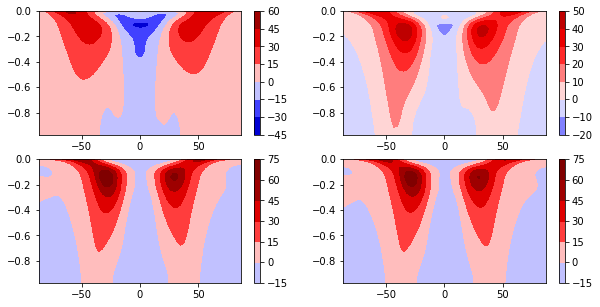

In [13]:
m=0
lat=div[0]['latn']
ind=np.squeeze(np.where((lat>0) & (lat<90)))
py.figure(figsize=(10,5))
for d in range(4):
    py.subplot(2,2,d+1)
    x=np.squeeze(raw[d]['U'][:,:,:].mean(axis=-1).transpose())
    py.contourf(lat, (-sigma_full/1000), x,vmin=-60,vmax=60,cmap=cm.seismic); py.colorbar()

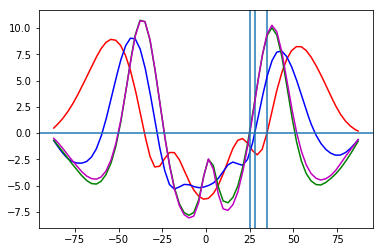

In [25]:
u5=raw[0]['U'][:,:,:].mean(axis=-1).transpose()[0,:]
u10=raw[1]['U'][:,:,:].mean(axis=-1).transpose()[0,:]
u50=raw[2]['U'][:,:,:].mean(axis=-1).transpose()[0,:]
u100=raw[3]['U'][:,:,:].mean(axis=-1).transpose()[0,:]

py.plot(lat, u5,'r')
py.axvline(35)
py.plot(lat, u10,'b')
py.axvline(28)
py.plot(lat, u50,'g')
py.plot(lat, u100,'m')
py.axvline(25)
py.axhline(0)

In [14]:
M = lambda x, y: x + y

In [15]:
TE=[]; MM=[]; SE=[]; INE=[]; TEv=[]; MMv=[]; SEv=[]; NEv=[]
for depth in range(4):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])
    MMv.append(M(flux_vert[depth]['MM']))
    SEv.append(M(flux_vert[depth]['SE']))
    TEv.append(M(flux_vert[depth]['TE']))
    NEv.append(M(flux_vert[depth]['NE']))

TypeError: <lambda>() takes exactly 2 arguments (1 given)

In [ ]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[]; div_TEv=[]; div_MMv=[]; div_SEv=[]; div_NEv=[]
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(4):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    div_TEv.append(div_vert[depth]['TE'])
    div_SEv.append(div_vert[depth]['SE'])
    div_MMv.append(div_vert[depth]['MM'])
    div_NEv.append(div_vert[depth]['NE'])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

# Average Northern and Southern Hemispheres

In [ ]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE)
TEv=np.array(TEv); SEv=np.array(SEv); MMv=np.array(MMv); NEv=np.array(NEv)
div_TEv=np.array(div_TEv); div_SEv=np.array(div_SEv); div_MMv=np.array(div_MMv); div_NEv=np.array(div_NEv)

Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);

ISFC=np.array(ISFC); ITOA=np.array(ITOA)

In [ ]:
TEv.shape

In [ ]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,...]+flux_flag*np.roll(x[:,l_S,...][:,::-1,...], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[...,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [ ]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
TEv_a  ,SEv_a    , MMv_a  , NEv_a    ,ignore,  lat_a = N_S_avg(TEv, SEv, MMv, NEv,NEv, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

In [ ]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x):
       N=1
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(4):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

div_TEv_a, div_SEv_a, div_MMv_a, div_NEv_a,ignore,lat_a = N_S_avg(div_TEv, div_SEv, div_MMv, div_NEv,div_NEv, lat,flux_flag=1)

In [ ]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((4,13))
  for d in range(0,4):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [ ]:
d=3
py.figure(figsize=(15,6))
v=np.linspace(-0.7,0.7,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full, (TEv_a[d,...,m]).transpose(),v,cmap=cm.seismic);py.colorbar()
    py.gca().invert_yaxis()
#     py.xlim(20,70)
py.tight_layout()

In [ ]:
la=2
ind=np.squeeze(np.where( (lat_a>la) & (lat_a<la+1) ))
d=0; v=np.linspace(-15,15,30)
vv=np.linspace(-60,60,30)
depths=np.array([5,10,50,100])
py.figure(figsize=(12,5))
for d in range(4):
    py.subplot(2,4,2*d+1)
    py.title(str(depths[d])+'m',fontsize=18)
    py.contourf(range(13),lat_a,MM_a[d,...],v,cmap=cm.seismic);py.colorbar()
    py.axhspan(la,la+1,color='k')
    
    py.subplot(2,4,2*(d+1))
    py.contourf(range(13),sigma_full, MMv_a[d,ind,:,:].mean(axis=0),vv,cmap=cm.seismic);py.colorbar()
#    c=py.contour(range(13),sigma_full, MMv_a[d,ind,:,:].mean(axis=0),np.linspace(-60,60,12),colors='k')
#    py.clabel(c, fontsize=9, inline=1,color='k')
    py.gca().invert_yaxis()
    py.title(str(depths[d])+'m',fontsize=18)
py.tight_layout()
print la

In [ ]:
d=1;m=m+1
if m==12 : m=0
print lat_a[np.squeeze(np.where( (lat_a>storm_pos[d,m]-0.1) & (lat_a<storm_pos[d,m]+0.1) ) )[-1]]
print storm_pos[d,m]

In [ ]:
print TEv_a.shape
t=np.zeros((40,13))

In [ ]:
lat_a[int(ind[0])]
# TEv_a[0,0,:,0].shape

In [ ]:
t=np.zeros((40,13))
t1=TE_a
la=la+2

d=0; v=np.linspace(-15,15,30)
vv=np.linspace(-2,2,50)
depths=np.array([5,10,50,100])
py.figure(figsize=(12,5))
t=np.zeros((40,13))
ind=np.zeros(13)
for d in range(4):
    
    for m in range(13):
        ind[m]=np.squeeze(np.where( (lat_a>storm_pos[d,m]-0.1) & (lat_a<storm_pos[d,m]+0.1) ) )[-1]
        t[:,m]=TEv_a[d,int(ind[m]),:,m]
    
    py.subplot(2,4,2*d+1)
    py.title(str(depths[d])+'m',fontsize=18)
    py.contourf(range(13),lat_a,t1[d,...],v,cmap=cm.seismic);py.colorbar()
    py.plot(range(13),storm_pos[d,:]) 
    py.subplot(2,4,2*(d+1))
    py.contourf(range(13),sigma_full, t,vv,cmap=cm.seismic);py.colorbar()
#    c=py.contour(range(13),sigma_full, MMv_a[d,ind,:,:].mean(axis=0),np.linspace(-60,60,12),colors='k')
#    py.clabel(c, fontsize=9, inline=1,color='k')
    py.gca().invert_yaxis()
    py.title(str(depths[d])+'m',fontsize=18)
py.tight_layout()

In [ ]:
t=np.zeros((40,13))
t1=MM_a
d=0; v=np.linspace(-15,15,30)
vv=np.linspace(-10,10,50)
depths=np.array([5,10,50,100])
py.figure(figsize=(12,5))
t=np.zeros((40,13))
ind=np.zeros(13)
for d in range(4):

    for m in range(13):
        ind[m]=np.squeeze(np.where( (lat_a>storm_pos[d,m]-0.1) & (lat_a<storm_pos[d,m]+0.1) ) )[-1]
        t[:,m]=MMv_a[d,int(ind[m]),:,m]    
        
    py.subplot(2,4,2*d+1)
    py.title(str(depths[d])+'m',fontsize=18)
    py.contourf(range(13),lat_a,t1[d,...],v,cmap=cm.seismic);py.colorbar()
    py.plot(range(13),storm_pos[d,:],color='k') 
    py.subplot(2,4,2*(d+1))
    py.contourf(range(13),sigma_full, t,vv,cmap=cm.seismic);py.colorbar()
    py.gca().invert_yaxis()
    py.title(str(depths[d])+'m',fontsize=18)
py.tight_layout()

In [ ]:
print TE_a.shape
print TEv_a.shape

In [ ]:
def AM(y):
    return np.squeeze(np.dstack([np.mean(y, axis=-1)]*13))


In [ ]:
t=np.zeros((40,13))
t1=TE_a
la=la+2

d=0; v=np.linspace(-15,15,30)
vv=np.linspace(-1,1,50)
depths=np.array([5,10,50,100])
py.figure(figsize=(12,5))
t=np.zeros((40,13))
ind=np.zeros(13)
for d in range(4):
    
    for m in range(13):
        ind[m]=np.squeeze(np.where( (lat_a>storm_pos[d,m]-0.1) & (lat_a<storm_pos[d,m]+0.1) ) )[-1]
        t[:,m]=TEv_a[d,int(ind[m]),:,m]
    
    py.subplot(2,4,2*d+1)
    py.title(str(depths[d])+'m',fontsize=18)
    py.contourf(range(13), lat_a, AM(t1[d,...]) ,v,cmap=cm.seismic);py.colorbar()
    py.contour(range(13),  lat_a, t1[d,...]-AM(t1[d,...]),v,cmap=cm.seismic)
    py.plot(range(13),storm_pos[d,:]) 
    
    py.subplot(2,4,2*(d+1))
    py.contourf(range(13),sigma_full, AM(t),vv,cmap=cm.seismic);py.colorbar()
    py.contour(range(13),sigma_full, t-AM(t),vv,cmap=cm.seismic)
    py.gca().invert_yaxis()
    py.title(str(depths[d])+'m',fontsize=18)

py.tight_layout()

In [ ]:
t=np.zeros((40,13))
t1=MM_a
la=la+2

d=0; v=np.linspace(-15,15,30)
vv=np.linspace(-5,5,50)
depths=np.array([5,10,50,100])
py.figure(figsize=(12,5))
t=np.zeros((40,13))
ind=np.zeros(13)
for d in range(4):
    
    for m in range(13):
        ind[m]=np.squeeze(np.where( (lat_a>storm_pos[d,m]-0.1) & (lat_a<storm_pos[d,m]+0.1) ) )[-1]
        t[:,m]=MMv_a[d,int(ind[m]),:,m]
    
    py.subplot(2,4,2*d+1)
    py.title(str(depths[d])+'m',fontsize=18)
    py.contourf(range(13), lat_a, AM(t1[d,...]) ,v,cmap=cm.seismic);py.colorbar()
    py.contour(range(13),  lat_a, t1[d,...]-AM(t1[d,...]),v,cmap=cm.seismic)
    py.plot(range(13),storm_pos[d,:]) 
    
    py.subplot(2,4,2*(d+1))
    py.contourf(range(13),sigma_full, AM(t),vv,cmap=cm.seismic);py.colorbar()
    py.contour(range(13),sigma_full, t-AM(t),vv,cmap=cm.seismic)
    py.gca().invert_yaxis()
    py.title(str(depths[d])+'m',fontsize=18)

py.tight_layout()

In [ ]:
t=np.zeros((40,13))
t1=MM_a
la=la+2

d=0; v=np.linspace(-15,15,30)
vv=np.linspace(-10,10,50)
depths=np.array([5,10,50,100])
py.figure(figsize=(12,5))
t=np.zeros((40,13))
ind=np.zeros(13)
for d in range(4):
    
    for m in range(13):
        ind[m]=np.squeeze(np.where( (lat_a>storm_pos[d,m]-0.1) & (lat_a<storm_pos[d,m]+0.1) ) )[-1]
        t[:,m]=MMv_a[d,int(ind[m]),:,m]
    
    py.subplot(2,4,2*d+1)
    py.title(str(depths[d])+'m',fontsize=18)
    py.contourf(range(13),lat_a,t1[d,...]-AM(t1[d,...]),v,cmap=cm.seismic);py.colorbar()
    py.plot(range(13),storm_pos[d,:]) 
    py.subplot(2,4,2*(d+1))
    py.contourf(range(13),sigma_full, t-AM(t[d,...]),vv,cmap=cm.seismic);py.colorbar()
#    c=py.contour(range(13),sigma_full, MMv_a[d,ind,:,:].mean(axis=0),np.linspace(-60,60,12),colors='k')
#    py.clabel(c, fontsize=9, inline=1,color='k')
    py.gca().invert_yaxis()
    py.title(str(depths[d])+'m',fontsize=18)
py.tight_layout()